In [1]:
import numpy as np
import n2o_config as config
import netCDF4
import matplotlib.pyplot as plt

In [2]:
from utils import str_to_datetime, print_current_step, parse_arguments, read_config

In [3]:
config_file = "n2o_config"
tc_params, sim_params = read_config(config_file)

In [4]:
def readfile(sim_params, curr_datetime):

    # create file names
    fname = os.path.join(
        sim_params["indir"],
        sim_params["inbase"] + datetime_to_str(curr_datetime) + ".nc",
    )
    fname2 = os.path.join(
        sim_params["indir2"],
        sim_params["inbase2"] + datetime_to_str(curr_datetime) + ".nc",
    )

    print("attempting to read file " + fname)

    dataset = netCDF4.Dataset(fname)
    tc_data = dict(
        slp=dataset.variables["pres_msl"][0],
        vor=dataset.variables["vor"][0, 32],
        u=dataset.variables["u"][0],
        v=dataset.variables["v"][0],
        hgt=dataset.variables["z_mc"][:],
        lon=dataset.variables["lon"][:],
        lat=dataset.variables["lat"][:],
    )
    dataset.close()

    print("attempting to read file " + fname2)

    dataset2 = netCDF4.Dataset(fname2)
    tc_data["tem"] = dataset2.variables["temp"][0, 0, :, :]
    dataset2.close()

    return tc_data

In [4]:
curr_datetime = str_to_datetime("2013-05-02T000000Z")

In [5]:
fname = "../data/REMAP_NWP_LAM_DOM01_20130601T000000Z.nc"
fname2 = "../data/REMAP_NWP_LAM_PL_T_DOM01_20130601T000000Z.nc"

In [6]:
dataset = netCDF4.Dataset(fname)

In [7]:
lon=dataset.variables["lon"][:]
lat=dataset.variables["lat"][:]
slp=dataset.variables["pres_msl"][0]
vor=dataset.variables["vor"][0, 32]
u=dataset.variables["u"][0]
v=dataset.variables["v"][0]
hgt=dataset.variables["z_mc"][:]
lon=dataset.variables["lon"][:]
lat=dataset.variables["lat"][:]

In [8]:
dataset2 = netCDF4.Dataset(fname2)
tem = dataset2.variables["temp"][0, 0, :, :]

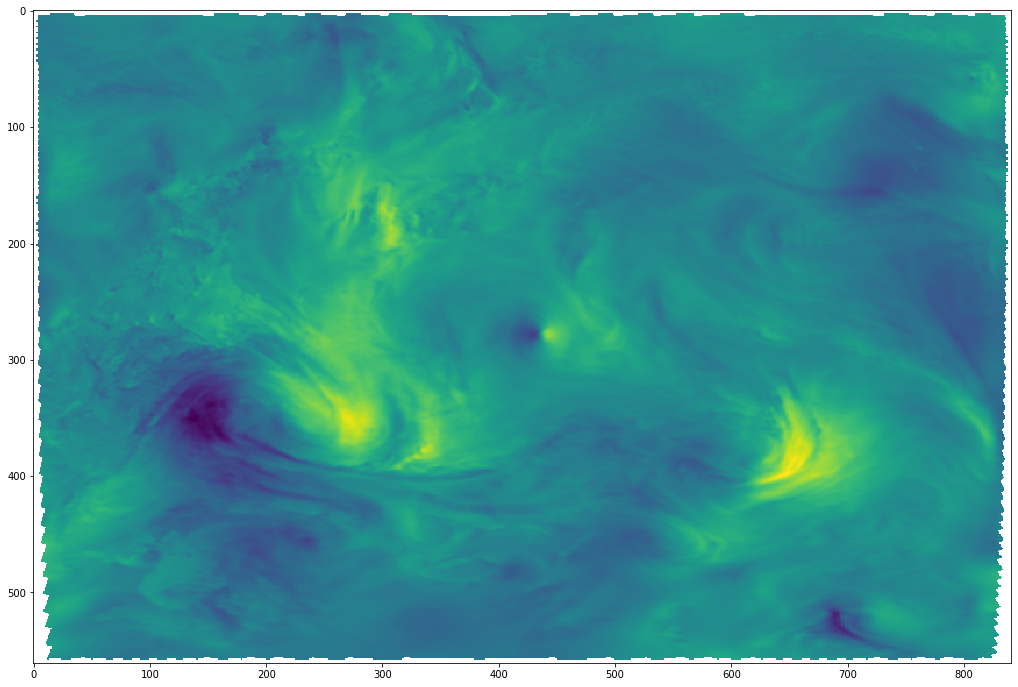

In [22]:
fig = plt.figure()
zoom = 3
w, h = fig.get_size_inches()
fig.set_size_inches(w * zoom, h * zoom)
plt.imshow(v[32,:,:])#.mask,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

In [103]:
lonx, laty = np.meshgrid(lon, lat)
mask = ~((1 <= laty) & (laty <= 69) & (lonx <= -16) & (-119 <= lonx))

In [79]:
lonx

masked_array(
  data=[[-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ],
        [-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ],
        [-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ],
        ...,
        [-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ],
        [-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ],
        [-120.   , -119.875, -119.75 , ...,  -15.25 ,  -15.125,  -15.   ]],
  mask=False,
  fill_value=1e+20)

In [82]:
mask

masked_array(
  data=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  mask=False,
  fill_value=1e+20)

In [130]:
mask = ~((1 <= laty) & (laty <= 69) & (lonx <= -16) & (-119 <= lonx))
R = 30
row = 590
col=60
i, j = np.indices(mask.shape)
mask[(i-row)**2 + (j-col)**2 < R**2] = True

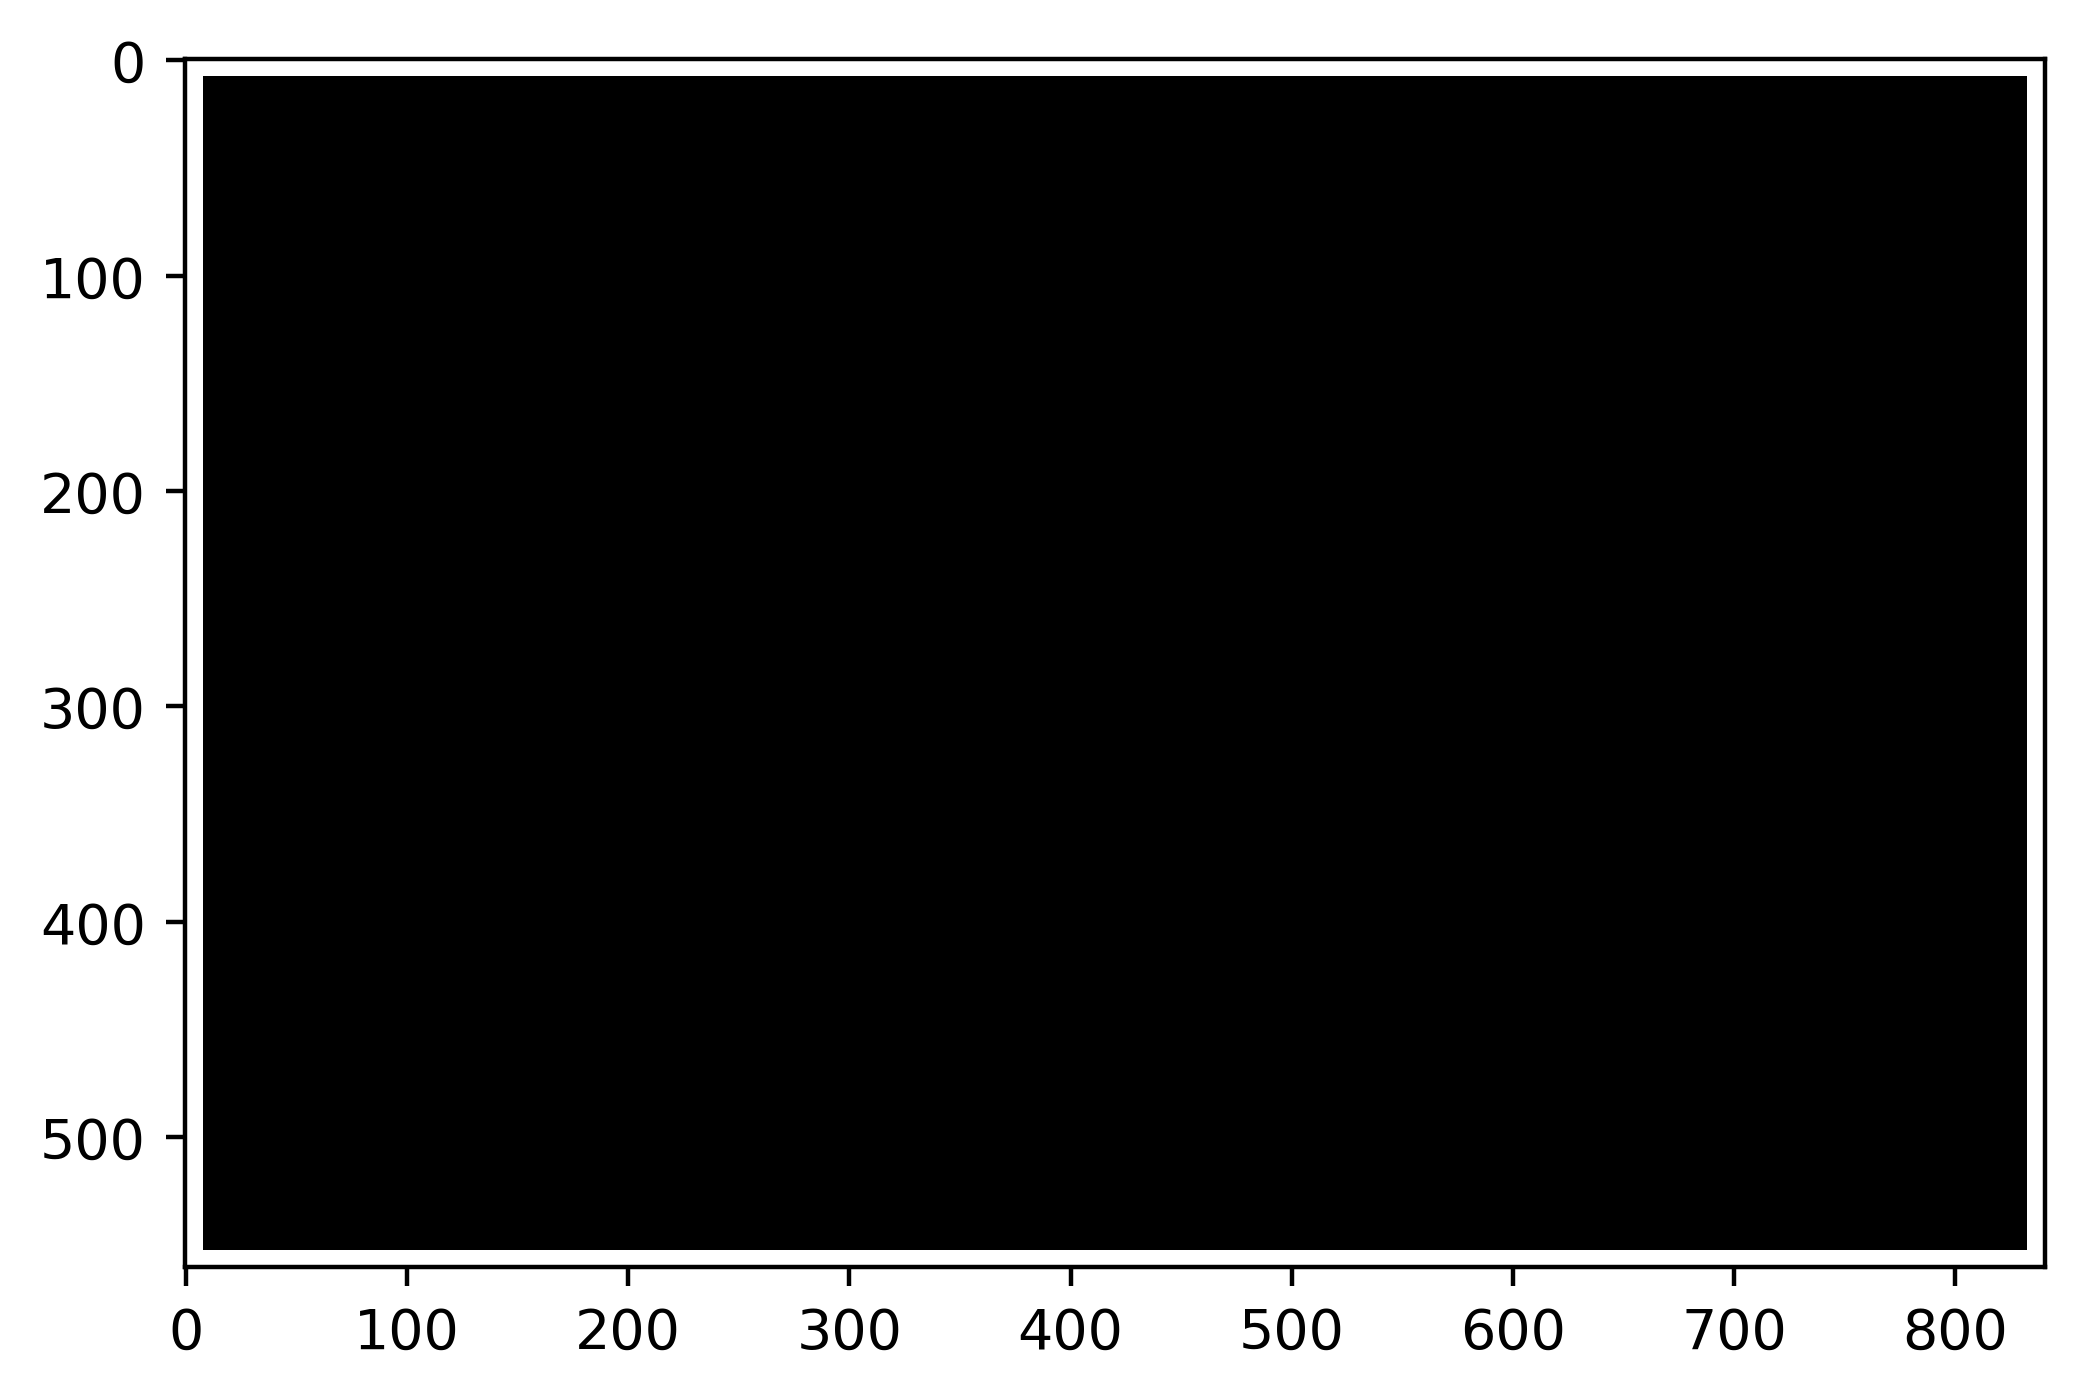

In [131]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.imshow(mask, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

In [41]:
np.argwhere(((lon >= -119) & (lon <=-16))

masked_array(data=[False, False, False, False, False, False, False, False,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,